| Stochastic RSI | Market trend analysis |
| ----------- | ----------- |

A stochastic RSI is a technical analysis indicator that is used to determine whether an asset is overbought or oversold. It is calculated by taking the average of the asset's closing prices over a certain time period and comparing that average to the current price. The resulting value is then plotted on a scale from 0 to 100, with a reading above 70 indicating that the asset is overbought and a reading below 30 indicating that it is oversold. 

Because the calculation of the stochastic RSI uses a statistical method known as random sampling, it is considered a stochastic indicator.

The stochastic RSI is more sensitive than the RSI providing more trading signals and entry / exit points or reversals in the market.

3-day SMA (Simple moving average) is usually overlayed in order to spot outlier or irregularities due to some strange market condition that disrupts the mathematical output.

Stoch-RSI usually is set for either 14 day or 14 hours.

In [12]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt

# dadad

In [53]:
# Inputs
ticker = 'PLTR'
start = dt.datetime(2022,1,1)
end = dt.datetime.now()

# GET data
yahoo_data = pdr.DataReader(ticker, 'yahoo', start, end)

yahoo_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,18.569000,17.860001,18.360001,18.530001,34283600,18.530001
2022-01-04,18.840000,17.790001,18.610001,18.170000,39643200,18.170000
2022-01-05,18.568001,16.870001,18.030001,16.959999,58445900,16.959999
2022-01-06,17.180000,16.055000,16.870001,16.740000,49737100,16.740000
2022-01-07,17.330000,16.475000,16.700001,16.559999,37989300,16.559999
...,...,...,...,...,...,...
2022-12-09,7.190000,7.030000,7.060000,7.110000,23346000,7.110000
2022-12-12,7.310000,7.090000,7.110000,7.290000,22672400,7.290000
2022-12-13,7.970000,7.490000,7.730000,7.500000,41033800,7.500000


In [54]:
# Preserve data and store as df (I just like doing this, keeping my data organized but uncessary)
df = yahoo_data

In [55]:
# Create exponential moving average indicator function
def EMA(data, period=20, column='Adj Close'):
    return[data[column].ewm(span=period, adjust=False).mean()]

"""  
The ewm() function is a built-in Pandas function that is used to calculate the exponential weighted moving average of a data set. 
It takes two main parameters: span, which specifies the number of past data points to include in the calculation, and adjust, which 
specifies whether to adjust the weights so that the sum of the weights is 1. 

"""

'  \nThe ewm() function is a built-in Pandas function that is used to calculate the exponential weighted moving average of a data set. \nIt takes two main parameters: span, which specifies the number of past data points to include in the calculation, and adjust, which \nspecifies whether to adjust the weights so that the sum of the weights is 1. \n\n'

In [56]:
# Create function to calculate the STOCHASTIC RSI
def stoch_rsi(data, period=14, column='Adj Close'):
    delta = data[column].diff(1) # Finds the discrete difference on the column axis
    delta.dropna(inplace=True)
    
    # Save positive and negative movements with copy()
    positive = delta.copy() # UP Movement(s)
    negative = delta.copy() # DOWN Movement(s)

    # Formulate query -> All positive values remain the same but everything negative is a minimum value of zero (0)
    positive[positive < 0] = 0
    negative[negative > 0] = 0

    # Create new column and store in df
    data['UP'] = positive
    data['DOWN'] = negative

    # Calculate averages -> gain and loss
    #POSTIVE GAIN
    avg_gain = positive.rolling(window=period).mean() # Aggregate days and calculate the mean
    #NEGATIVE GAIN
    avg_loss = abs(negative.rolling(window=period).mean())

    # # Calculate gains and losses at the row level
    # avg_gain = EMA(data, period, column='UP')
    # avg_loss = abs(EMA(data, period, column='DOWN'))

    # Calculat RS (Relative Strength)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100.0 - (100.0 / (1.0 + rs))

    # Calcultae Stochastic RSI
    s_rsi = (rsi - rsi.rolling(period).min()) / (rsi.rolling(period).max() - rsi.rolling(period).min())

    return s_rsi


In [58]:
# Store stochastic rsi data in new df column
df['stochastic_rsi'] = stoch_rsi(df)

df

,High,Low,Open,Close,Volume,Adj Close,UP,DOWN,stochastic_rsi
Date,,,,,,,,,
2022-01-03,18.569000,17.860001,18.360001,18.530001,34283600,18.530001,NaN,NaN,NaN
2022-01-04,18.840000,17.790001,18.610001,18.170000,39643200,18.170000,0.00,-0.360001,NaN
2022-01-05,18.568001,16.870001,18.030001,16.959999,58445900,16.959999,0.00,-1.210001,NaN
2022-01-06,17.180000,16.055000,16.870001,16.740000,49737100,16.740000,0.00,-0.219999,NaN
2022-01-07,17.330000,16.475000,16.700001,16.559999,37989300,16.559999,0.00,-0.180000,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-09,7.190000,7.030000,7.060000,7.110000,23346000,7.110000,0.00,-0.010000,0.551502
2022-12-12,7.310000,7.090000,7.110000,7.290000,22672400,7.290000,0.18,0.000000,0.837016
2022-12-13,7.970000,7.490000,7.730000,7.500000,41033800,7.500000,0.21,0.000000,0.958534


In [61]:
df.dropna(inplace=True)

df

,High,Low,Open,Close,Volume,Adj Close,UP,DOWN,stochastic_rsi
Date,,,,,,,,,
2022-02-10,14.165,13.370,13.50,13.56,41998200,13.56,0.00,-0.309999,1.000000
2022-02-11,13.920,12.970,13.45,13.13,41831600,13.13,0.00,-0.430000,0.949272
2022-02-14,13.795,12.980,13.10,13.26,40617900,13.26,0.13,0.000000,1.000000
2022-02-15,14.185,13.410,13.52,14.17,48523700,14.17,0.91,0.000000,1.000000
2022-02-16,14.260,13.660,13.91,13.97,58624400,13.97,0.00,-0.200000,1.000000
...,...,...,...,...,...,...,...,...,...
2022-12-09,7.190,7.030,7.06,7.11,23346000,7.11,0.00,-0.010000,0.551502
2022-12-12,7.310,7.090,7.11,7.29,22672400,7.29,0.18,0.000000,0.837016
2022-12-13,7.970,7.490,7.73,7.50,41033800,7.50,0.21,0.000000,0.958534


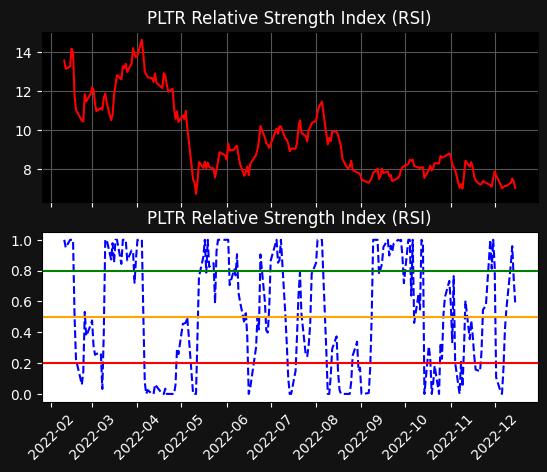

In [78]:
""" 
Plot the data
"""
# Create a figure and set of subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
# Remove the vertical gap between subplots
plt.subplots_adjust(hspace=.18) # IMPORTANT - spacing between charts

# Add grid lines
ax1.grid()
ax2.grid()

# Plot the close price
ax1.plot(df.index, df['Adj Close'], color = 'r')

# Plot the stochastic RSI
ax2.plot(df.index, df['stochastic_rsi'], color = 'b', linestyle='--')

# Add the oversold at 0.2 and overbought at 0.8
ax2.axhline(0.20, color='red') # Sell
ax2.axhline(0.50, color='orange') # Midpoint line
ax2.axhline(0.80, color='green') # Buy

# Rotate x-ticks by 45 degrees
plt.xticks(rotation=45)

""" 
Make the chart dark and cool

"""
# Stock price chart
ax1.set_title(f'{ticker} Relative Strength Index (RSI)', color='white')
ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

# Stochastic RSI chart
ax2.set_title(f'{ticker} Relative Strength Index (RSI)', color='white')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')



| END OF PROGRAM |
| ----------- |
| Notes for future DEV, and reference code below |